# Classificatino models

## Import libraries

In [1]:
%matplotlib inline
import numpy as np
from utils.helper import read_data
import utils.processing as processing
import matplotlib.pyplot as plt
FOLDER = "data/"
SAMPLE_SIZE = 1000
N_STATIC = 3
N_MOVING = 3

## Data preprocessing

Here we are reading the data from the files and combining the phases of size **SAMPLE_SIZE**. 

In [2]:
data_static = [read_data(FOLDER + "data_static_100_s_" + str(i+1) + ".csv") for i in range(N_STATIC)]
data_moving = [read_data(FOLDER + "data_moving_100_s_" + str(i+1) + ".csv") for i in range(N_MOVING)]
print(f"Shape one of three static datas: {data_static[0].shape}")
print(f"Shape one of three moving datas: {data_moving[0].shape}")

Shape one of three static datas: (3, 100000, 64)
Shape one of three moving datas: (3, 100000, 64)


In [3]:
from utils.helper import calculate_phases
phases_static = calculate_phases(data_static, N_STATIC, SAMPLE_SIZE)
phases_moving = calculate_phases(data_moving, N_STATIC, SAMPLE_SIZE)
print(f"Shape static phases: {phases_static.shape}")
print(f"Shape moving phases: {phases_moving.shape}")

train_data = np.concatenate((phases_static, phases_moving))
print(f"Shape train data: {train_data.shape}")

Shape static phases: (300, 1000)
Shape moving phases: (300, 1000)
Shape train data: (600, 1000)


Now we need to create labels for the training data.

In [4]:
indexes = np.arange(train_data.shape[0])
train_labels = indexes >= train_data.shape[0]/2
print("Shape train labels:", train_labels.shape)

Shape train labels: (600,)


Separete data in triain and test sets.

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_data, train_labels, test_size=0.2)
print(f"Shape train_X: {train_X.shape}")
print(f"Shape test_X: {test_X.shape}")
print(f"Shape train_y: {train_y.shape}")
print(f"Shape test_y: {test_y.shape}")

Shape train_X: (480, 1000)
Shape test_X: (120, 1000)
Shape train_y: (480,)
Shape test_y: (120,)


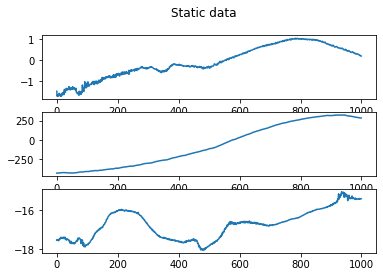

In [6]:
fig, axs = plt.subplots(3)
fig.suptitle('Static data')
axs[0].plot(train_X[0])
axs[1].plot(train_X[60])
axs[2].plot(train_X[400])

## Model

### Simple Threshold classifier

In [7]:
from sklearn.metrics import classification_report
means = np.mean(train_data, axis=1)
classified_data = means > 30 # False = not moving True = moving

print(classification_report(train_labels, classified_data))

              precision    recall  f1-score   support

       False       0.65      1.00      0.79       300
        True       1.00      0.46      0.63       300

    accuracy                           0.73       600
   macro avg       0.82      0.73      0.71       600
weighted avg       0.82      0.73      0.71       600



### Simple MLP classifier

In [8]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric
import numpy as np
from sklearn.model_selection import GridSearchCV

#create the corresponding net with the MLP classifier
nn_model = MLPClassifier(activation = "relu", hidden_layer_sizes=(20), solver = "adam", early_stopping=True, n_iter_no_change = 25, alpha = 0.01, verbose = 2)
nn_model.fit(train_X, train_y)

Iteration 1, loss = 11.06939653
Validation score: 0.541667
Iteration 2, loss = 12.56472034
Validation score: 0.520833
Iteration 3, loss = 14.31429469
Validation score: 0.520833
Iteration 4, loss = 14.24110967
Validation score: 0.520833
Iteration 5, loss = 13.21541155
Validation score: 0.520833
Iteration 6, loss = 11.82868069
Validation score: 0.520833
Iteration 7, loss = 10.88731320
Validation score: 0.520833
Iteration 8, loss = 12.04232234
Validation score: 0.520833
Iteration 9, loss = 14.13339967
Validation score: 0.520833
Iteration 10, loss = 14.27990119
Validation score: 0.520833
Iteration 11, loss = 13.54980158
Validation score: 0.520833
Iteration 12, loss = 12.18237414
Validation score: 0.500000
Iteration 13, loss = 10.45927787
Validation score: 0.437500
Iteration 14, loss = 9.49701840
Validation score: 0.520833
Iteration 15, loss = 9.18931595
Validation score: 0.520833
Iteration 16, loss = 9.77993480
Validation score: 0.520833
Iteration 17, loss = 9.27416852
Validation score: 0.

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=20,
              n_iter_no_change=25, verbose=2)

In [10]:
y_pred_nn = nn_model.predict(test_X)
# print("TEST: Precision score: ", precision_score(y_true = y_test, y_pred = y_pred_nn))
print(classification_report(test_y, y_pred_nn))

              precision    recall  f1-score   support

       False       0.73      0.42      0.53        65
        True       0.54      0.82      0.65        55

    accuracy                           0.60       120
   macro avg       0.64      0.62      0.59       120
weighted avg       0.64      0.60      0.59       120

